In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

PATH = "/home/luisandresilva/fastai/data/dogbreed/"
sz=224
bs=8
label_csv=f'{PATH}labels.csv'
n= len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)
arch=resnext101_64

os.listdir(PATH) # returns list

['tmp', 'test', 'models', 'train', 'labels.csv']

In [3]:
tfms = tfms_from_model(arch,sz, aug_tfms=transforms_side_on,max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH, folder='train', csv_fname=label_csv,tfms=tfms, val_idxs=val_idxs,bs=bs,suffix='.jpg',test_name='test',skip_header=True)
learn = ConvLearner.pretrained(arch, data, precompute=True)

Widget Javascript not detected.  It may not be installed or enabled properly.


 71%|███████▏  | 731/1023 [00:05<00:02, 136.46it/s, loss=5.74]


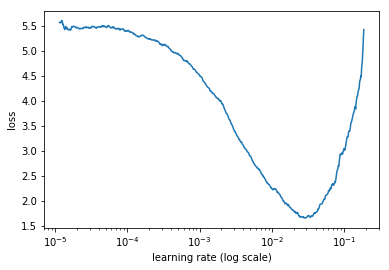

In [4]:
lrf=learn.lr_find()
learn.sched.plot()

In [5]:
lr=0.001

In [6]:
learn.fit(lr, 3,  cycle_len=1, cycle_mult=2)

Widget Javascript not detected.  It may not be installed or enabled properly.


epoch      trn_loss   val_loss   accuracy                      
    0      1.562715   0.937434   0.865234  
    1      0.766432   0.375295   0.920898                       
    2      0.677904   0.363842   0.917969                      
    3      0.516478   0.283893   0.921875                       
    4      0.445075   0.265795   0.918457                       
    5      0.391065   0.252194   0.926758                      
    6      0.352622   0.25679    0.92627                        



[0.25679004, 0.92626953125]

In [11]:
#lr = 0.0001
lrs = np.array([lr/9,lr/3,lr])

In [12]:
learn.unfreeze()
%time learn.fit(lrs,3,cycle_len=1, cycle_mult=2)

Widget Javascript not detected.  It may not be installed or enabled properly.


epoch      trn_loss   val_loss   accuracy                      
    0      0.421947   0.249555   0.927246  
    1      0.433561   0.237651   0.926758                      
    2      0.393793   0.227354   0.930176                      
    3      0.368985   0.2337     0.934082                      
    4      0.37433    0.223616   0.929688                      
    5      0.360944   0.217045   0.930664                      
    6      0.326374   0.223655   0.930664                      

CPU times: user 41min 34s, sys: 20min 13s, total: 1h 1min 47s
Wall time: 51min 9s


[0.22365542, 0.9306640625]

In [13]:
learn.save(f'{sz}')

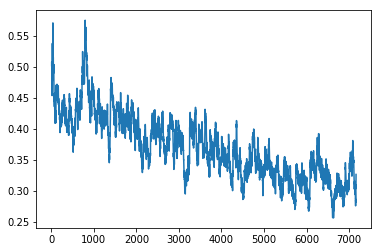

In [14]:
learn.sched.plot_loss()

In [15]:
multi_preds, y = learn.TTA()
probs = np.mean(np.exp(multi_preds), axis=0)
accuracy_np(probs,y),metrics.log_loss(y, probs)

In [18]:
import pandas as pd
DATA_DIR = os.path.join('/home','luisandresilva','.kaggle', 'competitions','dog-breed-identification')
print(DATA_DIR)
d=pd.read_csv(os.path.join(DATA_DIR, 'sample_submission.csv'))
d.head()

/home/luisandresilva/.kaggle/competitions/dog-breed-identification


,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [19]:
import numpy as np
log_preds = learn.predict(is_test=True)
probs = np.exp(log_preds)

In [20]:
# Cria data frame para submissão, com as probabilidades calculadas pelo modelo

df=pd.DataFrame(
    data=probs,
    columns=d.columns[1:], # Excluir primeira coluna, que é o ID
    index=[f[5:-4] for f in data.test_dl.dataset.fnames] 
)
df.index.name = 'id'

# Salva dataframe em arquivo CSV para envio para o Kaggle
arquivo_submissao = os.path.join(DATA_DIR,'fastai_submission.csv')
df.to_csv(arquivo_submissao)

In [21]:
arquivo_submissao = '/home/luisandresilva/.kaggle/competitions/dog-breed-identification/fastai_submission.csv'
comando = f'kaggle competitions submit -c dog-breed-identification -f {arquivo_submissao} -m "Submissão de teste"'
print(comando)

kaggle competitions submit -c dog-breed-identification -f /home/luisandresilva/.kaggle/competitions/dog-breed-identification/fastai_submission.csv -m "Submissão de teste"


In [22]:
! {comando}

2018-04-12 14:35:53,554 WARNING Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'SSLError(SSLError(1, '[SSL: UNKNOWN_PROTOCOL] unknown protocol (_ssl.c:749)'),)': /api/v1/competitions/submissions/url/28047372/1523554163237
Successfully submitted to Dog Breed Identification